In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
RAND_SEED=1

## 相位噪声模拟  
时间分辨率1us，采样率1MHz，模拟时间1s  
用布朗运动模拟相位噪声

      phase speed      phase
Mean    -0.000003 -10.174578
Std      0.013941   3.978187
Var      0.000194  15.825972


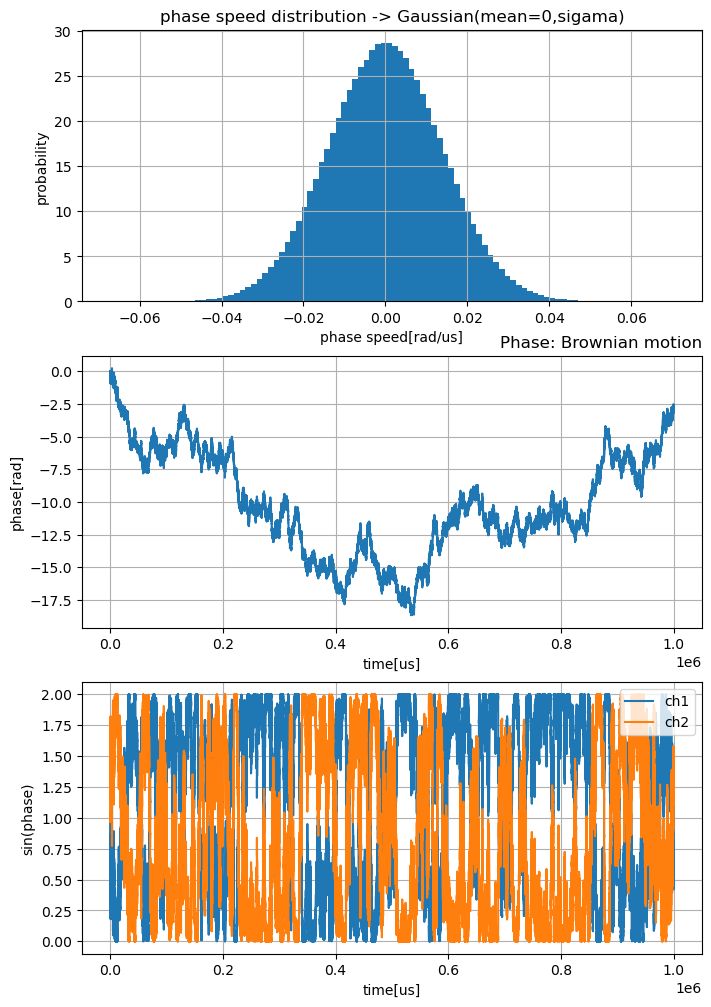

In [2]:
GAMMY=1.0

def get_sig_from_speed(phase_speed,channel):
    phase=np.cumsum(phase_speed)
    #phase*=np.pi/180
    if channel==1:
        return SIG_AMP*(GAMMY+np.sin(phase))
    elif channel==2:
        return SIG_AMP*(GAMMY-np.sin(phase))
def get_sig_from_phase(phase,channel):
    #phase*=np.pi/180
    if channel==1:
        return SIG_AMP*(GAMMY+np.sin(phase))
    elif channel==2:
        return SIG_AMP*(GAMMY-np.sin(phase))

PHASE_SEEPD=0.8/180*np.pi #rad/us
SIG_AMP=1 # 10sample/us  cps=10M
time_axis=np.arange(0,1e6,1) #1us分辨率，len=1s  SR=1M
rng=np.random.default_rng(RAND_SEED)
phase_speed=rng.normal(0,PHASE_SEEPD,time_axis.shape)
phase_speed[0]=0
phase=np.cumsum(phase_speed)
sig_ch1=get_sig_from_speed(phase_speed,1)
sig_ch2=get_sig_from_speed(phase_speed,2)
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.hist(phase_speed,bins=100,density=True)
plt.ylabel('probability')
plt.xlabel('phase speed[rad/us]')
plt.title('phase speed distribution -> Gaussian(mean=0,sigama)')
plt.grid()
plt.subplot(3,1,2)
plt.plot(time_axis,phase)
plt.xlabel('time[us]')
plt.ylabel('phase[rad]')
plt.title('Phase: Brownian motion',loc='right')
plt.grid()
plt.subplot(3,1,3)
plt.plot(time_axis,sig_ch1,label='ch1')
plt.plot(time_axis,sig_ch2,label='ch2')
plt.xlabel('time[us]')
plt.ylabel('sin(phase)')
plt.grid()
plt.legend(loc=1)
#plt.xlim(0,100000)

df=pd.DataFrame({'Mean':phase_speed.mean(),'Std':phase_speed.std(),'Var':phase_speed.var()},index=['phase speed']).T
def push_data(data,name):
    df[name]=[data.mean(),data.std(),data.var()]
    print(df)
push_data(phase,'phase')

In [3]:
PHASE_SEEPD=0.8/180*np.pi #rad/us
SIG_AMP=1 # 10sample/us  cps=10M
RAND_NUM=10 # 随机模拟次数
time_axis=np.arange(0,1e5,1) #1us分辨率，len=1e5us  SR=1M
time_exposure=1000
RAND_SEED=2025

如果相位噪声满足独立随机分布，那么用var评估比较好，因为其关于时间（采样点）是线性的；

In [4]:
def crb(tau,with_prior):
    mu=SIG_AMP*2
    V=GAMMY
    sigma=PHASE_SEEPD
    D=sigma*sigma
    ka=0
    a=PHASE_SEEPD/np.sqrt(2*SIG_AMP)
    i_eff=mu*tau*np.exp(-D*tau)
    i_prio=1/(sigma*sigma*tau+ka/mu/V/V)
    i_prio=1/(sigma*sigma*tau+a)
    if with_prior:
        return i_prio+i_eff
    else:
        return i_eff

c1_,c2_,c3_,c4_='#f1ddbf', '#525e75', '#78938a', '#92ba92'
c5,c1,c2,c3,c4="#d9042b","#730220","#03658c","#f29f05","#f27b50"


In [5]:
V0=1
def func_diffusion(tau,mu,D=PHASE_SEEPD**2):
    return D*tau
def func_shot_noise(tau,mu,D=PHASE_SEEPD**2):
    return 1/(mu*tau)
def func_without_prior(tau,mu,D=PHASE_SEEPD**2):
    return 1/(mu*tau*np.exp(-D*tau)*V0*V0)+func_diffusion(tau,mu,D)
def func_with_prior(tau,mu,D=PHASE_SEEPD**2):
    a=np.sqrt(D/mu/V0/V0)
    return 1/((mu*tau*np.exp(-D*tau)*V0*V0)+1/(D*tau+a))+func_diffusion(tau,mu,D)
def func_sigma_inf(tau,mu,D=PHASE_SEEPD**2):
    return np.sqrt(D/mu/V0/V0)
def func_tau_opt(mu,D=PHASE_SEEPD**2):
    return 1/np.sqrt(mu*D)

### 正文无模拟点

## 3d图

/var/folders/nx/zj1vqp1j21524rfk5s8nbb9h0000gn/T/ipykernel_91728/1875387888.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1/(mu*tau*np.exp(-D*tau)*V0*V0)+func_diffusion(tau,mu,D)


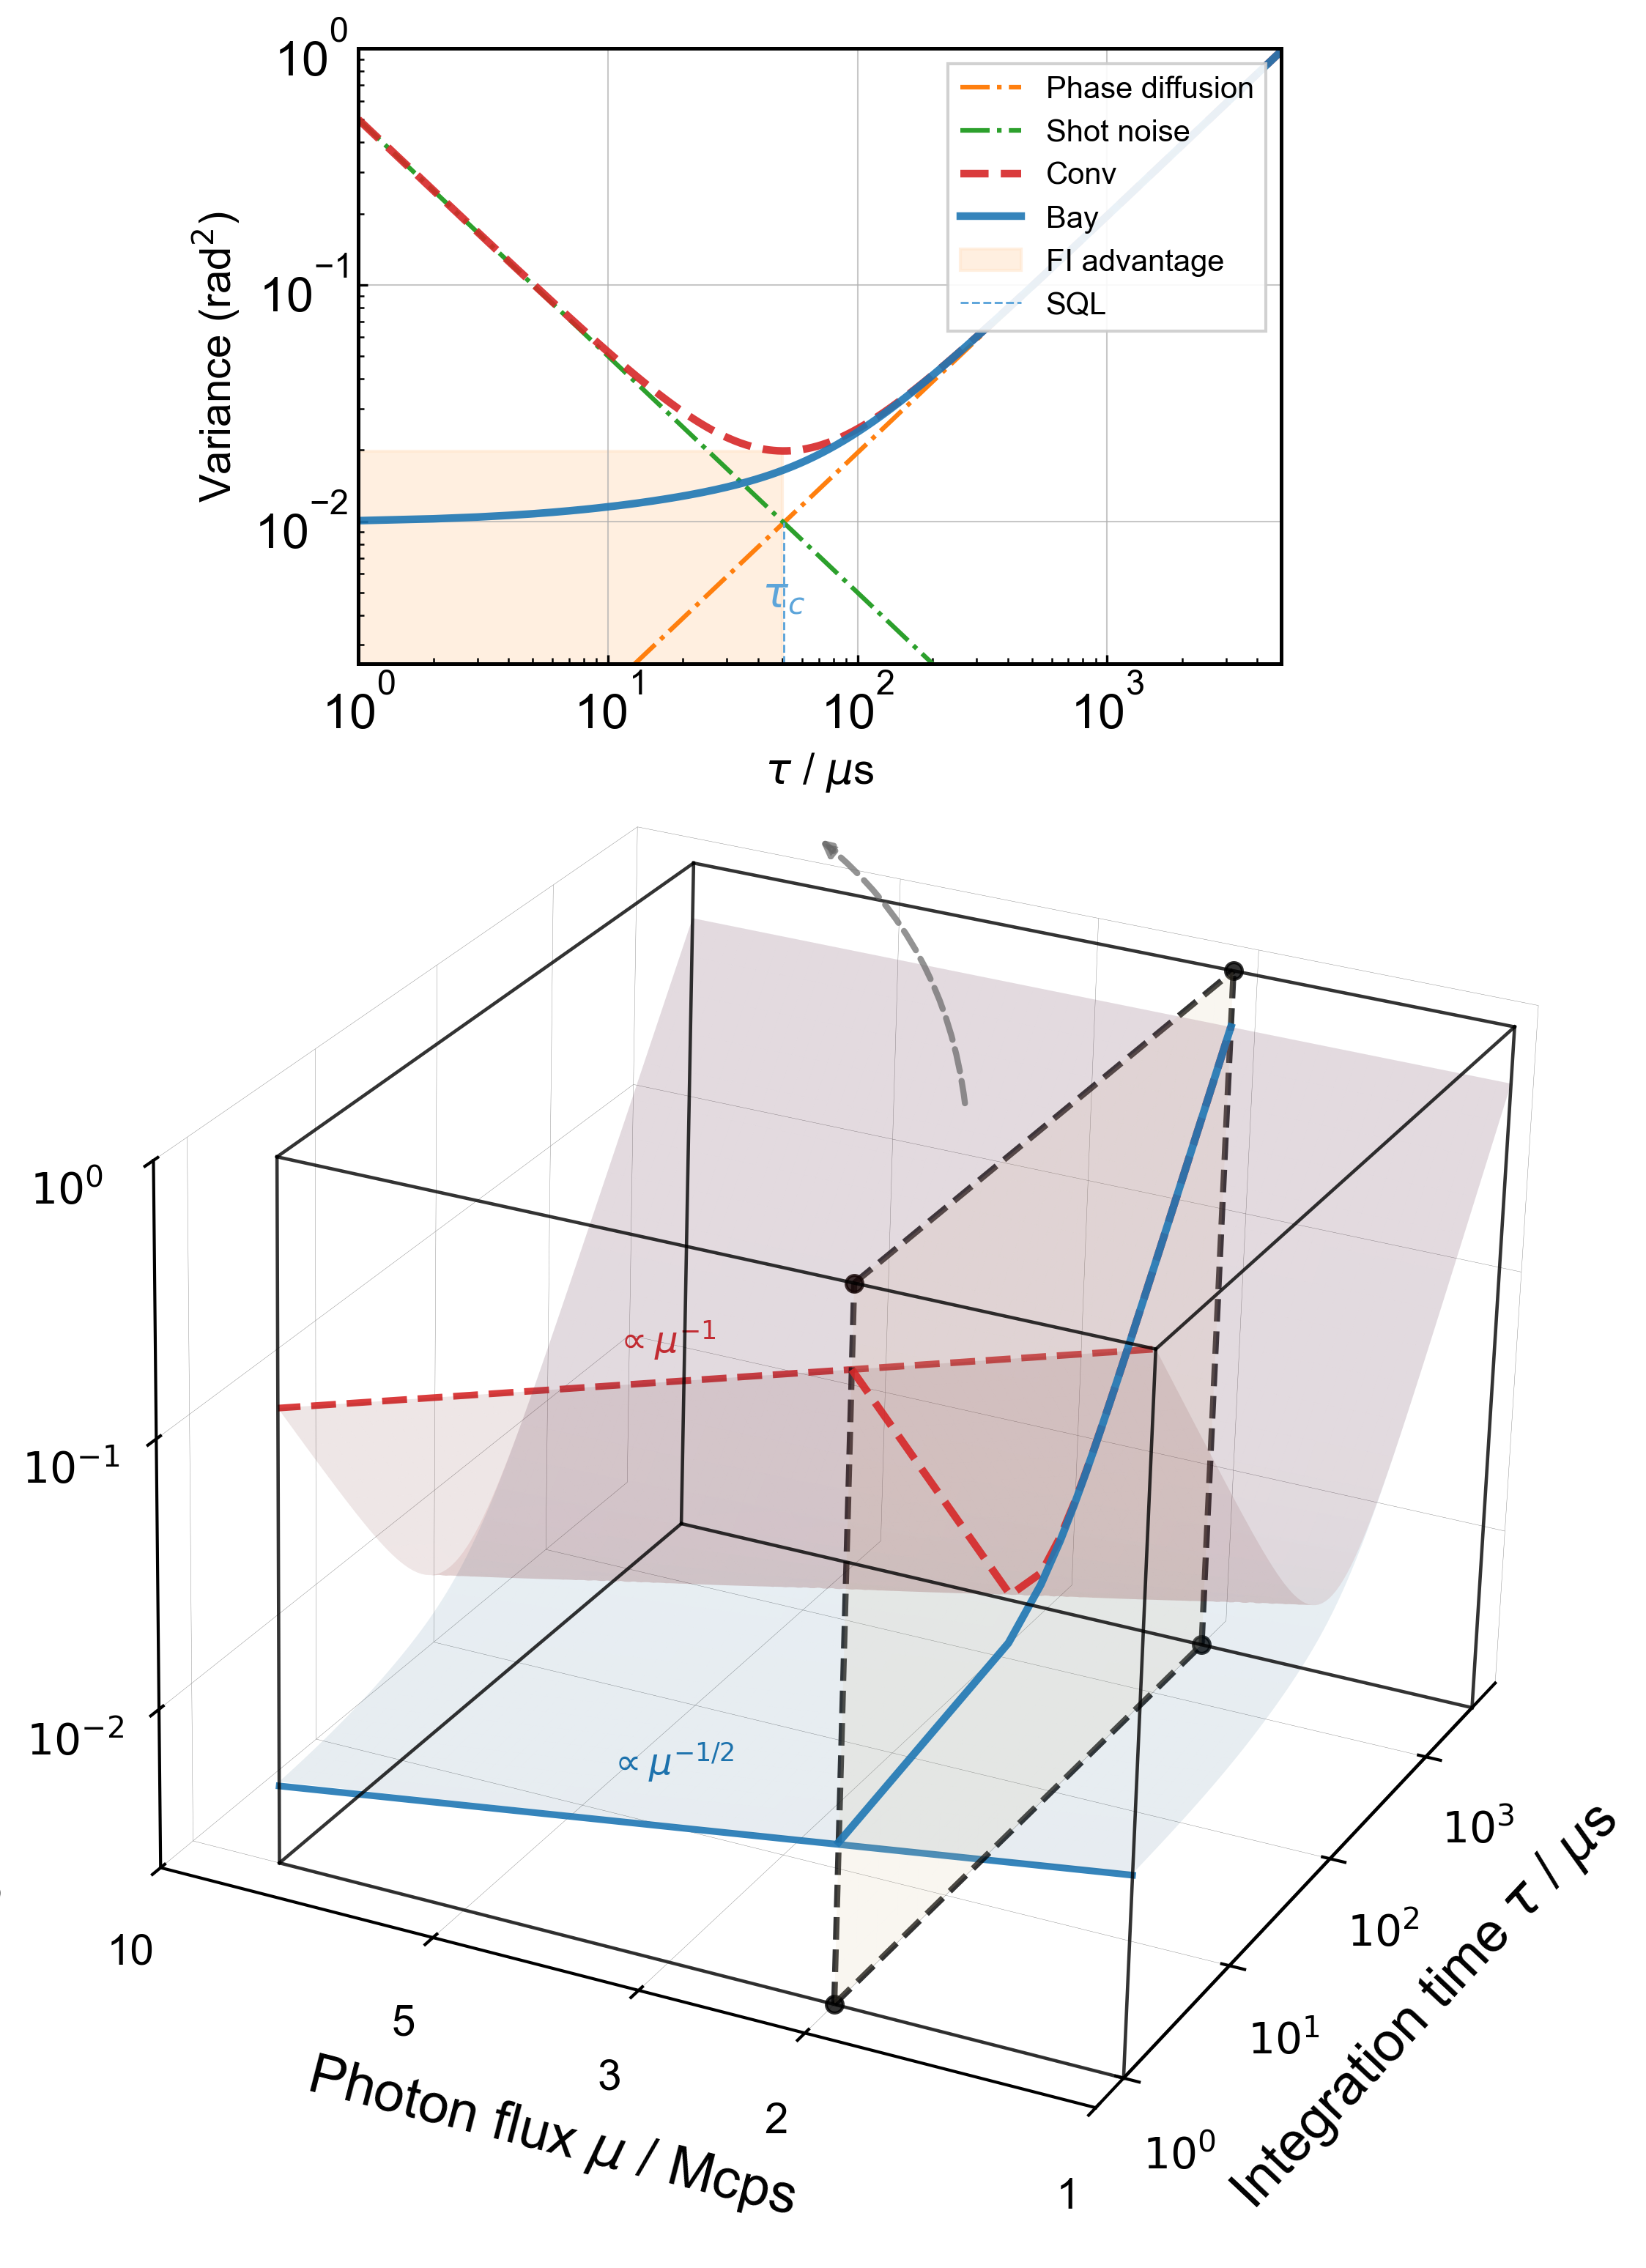

In [17]:
# 3D 曲线：以 tau 为横轴、mu 为纵轴、函数值为 z，仅显示 4 条曲线
# Nature journal style 3D plot - Enhanced cross-section visualization
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import ConnectionPatch



# Colors
c1_ = '#FFE5CC'
c2 = '#1f77b4'
c2_ = '#5DA5DA'
c3 = '#ff7f0e'
c4 = '#2ca02c'
c5 = '#d62728'

# Set Nature-style font parameters
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'axes.linewidth': 1.0,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.5,
    'xtick.major.width': 1.0,
    'ytick.major.width': 1.0,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
})

# 采样范围
tau = np.linspace(1, 10**3.5, 100)
mu_list = [SIG_AMP*1, SIG_AMP*2, SIG_AMP*2*2]

# Create figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 创建 tau 和 mu 的网格
tau_surf = np.logspace(0, 3.5, 100)
mu_surf = np.logspace(np.log10(mu_list[0]), np.log10(mu_list[-1]*2), 200)
Tau_grid, Mu_grid = np.meshgrid(tau_surf, mu_surf)

# 计算两个函数在网格上的值
Z_without_prior = np.zeros_like(Tau_grid)
Z_with_prior = np.zeros_like(Tau_grid)

for i in range(len(mu_surf)):
    Z_without_prior[i, :] = func_without_prior(tau_surf, mu_surf[i])
    Z_with_prior[i, :] = func_with_prior(tau_surf, mu_surf[i])

# 绘制三维曲面
surf1 = ax.plot_surface(np.log10(Tau_grid), np.log10(Mu_grid), np.log10(Z_without_prior),
                        alpha=0.1, rstride=3, cstride=3, linewidth=0,
                        antialiased=True, color=c5)
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d

surf2 = ax.plot_surface(np.log10(Tau_grid), np.log10(Mu_grid), np.log10(Z_with_prior),
                        alpha=0.1, rstride=3, cstride=3, linewidth=0,
                        antialiased=True, color=c2)
surf2._facecolors2d = surf2._facecolor3d
surf2._edgecolors2d = surf2._edgecolor3d

# y 轴范围 mu
_mu_min = np.log10(mu_list[0])
_mu_max = np.log10(mu_list[-1]*2)
# x 轴范围 tau
_x_min, _x_max = 0, 3.5

# 在 yz 平面上添加曲线
_mu_l = np.linspace(10**_mu_min, 10**(_mu_max), 1000)
z_sigma_info = func_sigma_inf(tau, _mu_l)
z_without_sigma_info = func_without_prior(1, _mu_l)
_index_si = (z_sigma_info >= 10**(-2.6)) & (z_sigma_info <= 10**(0))
_index_wo_si = (z_without_sigma_info >= 10**(-2.6)) & (z_without_sigma_info <= 10**(0))

ax.plot(np.full_like(_mu_l[_index_si], 0), np.log10(_mu_l[_index_si]), 
        np.log10(z_sigma_info[_index_si]), lw=2.2, color=c2, linestyle='-', alpha=0.9)
ax.plot(np.full_like(_mu_l[_index_wo_si], 0), np.log10(_mu_l[_index_wo_si]), 
        np.log10(z_without_sigma_info[_index_wo_si]), lw=2.2, color=c5, linestyle='--', alpha=0.9)

# 设置横截面的 mu 值
cross_section_mu = SIG_AMP * 2
mu_log = np.log10(cross_section_mu)

# ===== ENHANCED CROSS-SECTION VISUALIZATION (Similar to image style c or f) =====
# Create a rectangular frame with dashed boundaries and shaded interior

# Define cross-section plane coordinates
y_val = mu_log
x_range = np.linspace(_x_min, _x_max, 20)
z_range = np.linspace(-2.6, 0, 20)

# Create mesh for the plane
X_plane, Z_plane = np.meshgrid(x_range, z_range)
Y_plane = np.full_like(X_plane, y_val)

# Draw semi-transparent plane with a beige/cream color
plane = ax.plot_surface(X_plane, Y_plane, Z_plane, 
                        alpha=0.15,
                        antialiased=True,
                        color='#F5DEB3',  # Wheat/beige color
                        linewidth=0)

# Draw the boundary frame with dashed lines (similar to image styles)
# Bottom edge
ax.plot([_x_min, _x_max], [y_val, y_val], [-2.6, -2.6], 
        'k--', linewidth=2, alpha=0.8)
# Top edge
ax.plot([_x_min, _x_max], [y_val, y_val], [0, 0], 
        'k--', linewidth=2, alpha=0.8)
# Left edge
ax.plot([_x_min, _x_min], [y_val, y_val], [-2.6, 0], 
        'k--', linewidth=2, alpha=0.8)
# Right edge
ax.plot([_x_max, _x_max], [y_val, y_val], [-2.6, 0], 
        'k--', linewidth=2, alpha=0.8)

# Add corner markers for emphasis (optional, similar to image style)
corner_size = 0.15
corners = [
    (_x_min, -2.6), (_x_max, -2.6), (_x_min, 0), (_x_max, 0)
]
for cx, cz in corners:
    ax.scatter([cx], [y_val], [cz], color='black', s=30, alpha=0.8, zorder=10)

ax.set_ylim3d(_mu_min, _mu_max)
ax.set_zlim3d(-2.6, 0)

# 绘制横截面上的曲线
curves = []
z1 = func_without_prior(tau, 2*SIG_AMP)
z2 = func_with_prior(tau, 2*SIG_AMP)
curves.append(('Without prior', 2*SIG_AMP, tau, z1, '--'))
curves.append(('With prior', 2*SIG_AMP, tau, z2, '-'))

for idx, (kind, mu_i, x_tau, z_val, linestyle) in enumerate(curves):
    y_mu = np.full_like(x_tau, mu_i)
    curve_color = c5 if 'Without' in kind else c2
    ax.plot(np.log10(x_tau), np.log10(y_mu), np.log10(z_val), 
            lw=2.5, color=curve_color, linestyle=linestyle,
            label=f'{kind}, μ={mu_i:.1f}', alpha=0.9, zorder=15)

# Nature-style axis settings
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis._axinfo["grid"].update({
        "color": "#808080",
        "linestyle": "-",
        "linewidth": 0.1,
        "alpha": 0.2
    })
    axis._axinfo["axisline"]["linewidth"] = 1.2
    axis.pane.set_edgecolor('none')

ax.tick_params(axis='x', which='major', direction='in', pad=8, length=4, width=1.0)
ax.tick_params(axis='y', which='major', direction='in', pad=8, length=4, width=1.0)
ax.tick_params(axis='z', which='major', direction='in', pad=8, length=4, width=1.0)

# Axis labels
ax.set_xlabel('Integration time $\\tau$ / $\\mu$s', labelpad=15, fontsize=18, fontweight='normal')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$'], fontsize=14)

mu_label_list = [1, 2, 3, 5, 10]
ax.set_ylabel('Photon flux $\\mu$ / Mcps', labelpad=15, fontsize=18, fontweight='normal')
ax.set_yticks([np.log10(mu) for mu in mu_label_list])
ax.set_yticklabels([f'{mu:.0f}' for mu in mu_label_list], fontsize=14)

ax.set_zlabel('Residual phase variance (rad$^2$)', labelpad=15, fontsize=18, fontweight='normal')
ax.set_zticks([0, -1, -2])
ax.set_zticklabels(['$10^{0}$', '$10^{-1}$', '$10^{-2}$'], fontsize=14)

# Draw a full bounding box around the 3D axes
_z_min, _z_max = -2.6, 0
_box_edges = [
    ((_x_min, _x_min), (_mu_min, _mu_min), (_z_min, _z_max)),
    ((_x_max, _x_max), (_mu_min, _mu_min), (_z_min, _z_max)),
    ((_x_min, _x_min), (_mu_max, _mu_max), (_z_min, _z_max)),
    ((_x_max, _x_max), (_mu_max, _mu_max), (_z_min, _z_max)),
    ((_x_min, _x_max), (_mu_min, _mu_min), (_z_min, _z_min)),
    ((_x_min, _x_max), (_mu_min, _mu_min), (_z_max, _z_max)),
    ((_x_min, _x_max), (_mu_max, _mu_max), (_z_min, _z_min)),
    ((_x_min, _x_max), (_mu_max, _mu_max), (_z_max, _z_max)),
    ((_x_min, _x_min), (_mu_min, _mu_max), (_z_min, _z_min)),
    ((_x_min, _x_min), (_mu_min, _mu_max), (_z_max, _z_max)),
    ((_x_max, _x_max), (_mu_min, _mu_max), (_z_min, _z_min)),
    ((_x_max, _x_max), (_mu_min, _mu_max), (_z_max, _z_max)),
 ]
for _xs, _ys, _zs in _box_edges:
    ax.plot(_xs, _ys, _zs, color='k', linewidth=1.1, alpha=0.8, zorder=20)


# View angle
ax.view_init(elev=25, azim=205, roll=-1.6)

z_label = ax.zaxis.label
z_label.set_visible(True)
ax.zaxis._axinfo['label']['space_factor'] = 2.5

# Add asymptotic scaling labels
_mu_mid = 10**((_mu_min + _mu_max) / 2)
_z_sigma_mid = func_sigma_inf(1, _mu_mid)
_z_wo_mid = func_without_prior(1, _mu_mid)

ax.text(0.05, np.log10(_mu_mid)+0.1, np.log10(_z_sigma_mid) + 0.1,
        '$\\propto \\mu^{-1/2}$', color=c2, fontsize=12)
ax.text(0.05, np.log10(_mu_mid)+0.1, np.log10(_z_wo_mid),
        '$\\propto \\mu^{-1}$', color=c5, fontsize=12)

# Inset plot
inset_pos = [0.32, 0.95, 0.35, 0.35]
ax_inset = fig.add_axes(inset_pos)

bandwith_tau = 1/(PHASE_SEEPD*np.sqrt(2*SIG_AMP))
mu = SIG_AMP*2
phase_var_limit = PHASE_SEEPD/np.sqrt(2*SIG_AMP)
adv_up = phase_var_limit*2
adv_low = phase_var_limit*1e-5

ax_inset.plot(time_axis, func_diffusion(time_axis, mu), '-.', label='Phase diffusion', color=c3)
ax_inset.plot(time_axis[1:], func_shot_noise(time_axis[1:], mu), '-.', label='Shot noise', color=c4)
ax_inset.loglog(time_axis, func_without_prior(time_axis, mu),'--',color=c5, label='Conv',lw=2.5,alpha=0.9)
ax_inset.loglog(time_axis, func_with_prior(time_axis, mu), '-', color=c2, label='Bay',lw=2.5,alpha=0.9)
# ax_inset.hlines(phase_var_limit, 1, bandwith_tau, linestyles=':', color='k', linewidth=1)
# ax_inset.text(bandwith_tau*1e-1, phase_var_limit, '$\\sigma_{\\infty}^2$', ha='center', va='top', fontsize=14, color='k')

ax_inset.fill_between(time_axis[time_axis<=bandwith_tau], adv_low, adv_up, color=c1_, alpha=0.6, label='FI advantage')
ax_inset.vlines(bandwith_tau, 25e-4, phase_var_limit, linestyles='--', color=c2_, linewidth=0.7,label="SQL")
ax_inset.text(bandwith_tau, 40e-4, '$τ_{c}$', ha='center', va='bottom', fontsize=14, color=c2_)

ax_inset.set_xscale('log')
ax_inset.set_yscale('log')
ax_inset.set_ylim(25e-4, 1)
ax_inset.set_xlim(1, 5e3)
ax_inset.grid(alpha=0.7)
ax_inset.set_xlabel('$\\tau$ / $\\mu$s', fontsize=14, fontweight='normal')
ax_inset.set_ylabel('Variance (rad$^2$)', fontsize=14, fontweight='normal')

ax_inset.tick_params(axis='both', which='major', labelsize=16, direction='in', length=3, width=0.8)
ax_inset.tick_params(axis='both', which='minor', labelsize=16, direction='in', length=2, width=0.6)

ax_inset.patch.set_facecolor('white')
ax_inset.patch.set_alpha(0.98)

ax_inset.legend(loc='upper right', fontsize=10, frameon=True, 
                framealpha=0.9, edgecolor='#CCCCCC', 
                fancybox=False, shadow=False)

for spine in ax_inset.spines.values():
    spine.set_edgecolor('#000000')
    spine.set_linewidth(1.2)
    spine.set_zorder(2)

# Connection arrow
conn_arrow_style = dict(
    arrowstyle="-|>",
    color="#666666",
    linewidth=2,
    alpha=0.7,
    linestyle="--",
    connectionstyle="arc3,rad=0.2"
 )

inset_left = inset_pos[0]
inset_bottom = inset_pos[1]
inset_width = inset_pos[2]

conn_arrow = ConnectionPatch(
    xyA=(0.55, 0.7),
    xyB=(inset_left+inset_width/2, inset_bottom-0.1),
    coordsA="figure fraction",
    coordsB="figure fraction",
    **conn_arrow_style
)
fig.add_artist(conn_arrow)

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.savefig('fig2_3d_final.pdf', bbox_inches='tight', pad_inches=1)